<a href="https://colab.research.google.com/github/gsakkar/ML/blob/main/feature-engineering/feature-eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering: A Comprehensive Guide with Examples and ML Terminology

In the realm of machine learning (ML) and data science, the process of creating a successful model often hinges on the quality of the features used. This is where feature engineering comes into play – it's the art and science of transforming raw data into informative features that can significantly enhance the performance of ML algorithms.

## Key ML Terminology

Before we dive into specific techniques, let's clarify some key machine learning terms:

1. **Feature**: An individual measurable property or characteristic of a phenomenon being observed. In ML, features are the input variables used to make predictions.

2. **Target Variable**: The output variable that the ML model is trying to predict.

3. **Supervised Learning**: A type of ML where the model is trained on labeled data, learning to map input features to known output values.

4. **Unsupervised Learning**: A type of ML where the model is trained on unlabeled data, trying to find patterns or structures within the data.

5. **Overfitting**: When a model learns the training data too well, including its noise and peculiarities, leading to poor generalization on new, unseen data.

6. **Underfitting**: When a model is too simple to capture the underlying structure of the data, leading to poor performance on both training and new data.

# Install Dependencies and Import libraies

In [29]:
!pip install pandas numpy matplotlib seaborn scikit-learn category_encoders

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from category_encoders import BinaryEncoder, TargetEncoder

# Set random seed for reproducibility
np.random.seed(42)

## Setting Up Our Example

Let's create a sample dataset to work with. This dataset will include various types of features that we'll use to demonstrate different feature engineering techniques.

In [36]:
# Create sample data
data = pd.DataFrame({
    'age': np.random.randint(18, 70, 1000),
    'income': np.random.randint(20000, 200000, 1000),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 1000),
    'job_category': np.random.choice(['Entry', 'Mid', 'Senior', 'Executive'], 1000),
    'credit_score': np.random.randint(300, 850, 1000),
    'has_car': np.random.choice([True, False], 1000),
    'favorite_color': np.random.choice(['Blue', 'Red', 'Green', 'Yellow', 'Purple'], 1000)
})

# Add some missing values
data.loc[np.random.choice(data.index, 50), 'credit_score'] = np.nan

print("Original Data:")
print(data.head())
print("\nData Info:")
print(data.info())

Original Data:
   age  income education job_category  credit_score  has_car favorite_color
0   47  119477       PhD          Mid         363.0     True          Green
1   36  146083  Bachelor       Senior         529.0     True           Blue
2   66  132698  Bachelor          Mid           NaN     True          Green
3   42  131560    Master          Mid         545.0     True         Purple
4   33  151907  Bachelor       Senior         456.0    False         Yellow

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1000 non-null   int64  
 1   income          1000 non-null   int64  
 2   education       1000 non-null   object 
 3   job_category    1000 non-null   object 
 4   credit_score    951 non-null    float64
 5   has_car         1000 non-null   bool   
 6   favorite_color  1000 non-null   object 
dtypes:

## 1. Feature Creation

Feature creation involves generating new features from existing ones. This process often leverages domain knowledge to capture important relationships or characteristics in the data that might not be immediately apparent.

Example: Let's create an 'income_per_age' feature, which might capture how efficiently a person earns income relative to their age.

In [37]:
data['income_per_age'] = data['income'] / data['age']
print("Feature Creation - income_per_age:")
print(data[['age', 'income', 'income_per_age']].head())

Feature Creation - income_per_age:
   age  income  income_per_age
0   47  119477     2542.063830
1   36  146083     4057.861111
2   66  132698     2010.575758
3   42  131560     3132.380952
4   33  151907     4603.242424


## 2. Feature Transformation

Feature transformation involves changing the scale or distribution of a feature. This can help in meeting the assumptions of ML algorithms or in revealing non-linear relationships.

Example: Let's apply a log transformation to 'income'. This can be useful for handling skewed data or when we expect the impact of income to be multiplicative rather than additive.

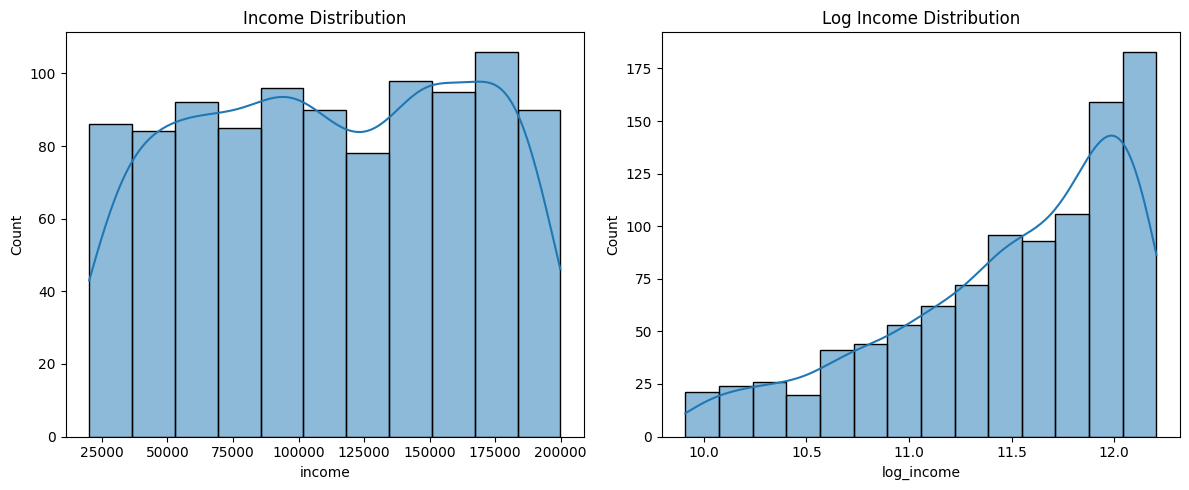

Feature Transformation - log_income:
              income   log_income
count    1000.000000  1000.000000
mean   111997.235000    11.483327
std     51939.915968     0.583490
min     20126.000000     9.909768
25%     67569.000000    11.120903
50%    111508.000000    11.621851
75%    157077.250000    11.964493
max    199917.000000    12.205658


In [35]:
data['log_income'] = np.log(data['income'])

plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(data['income'], kde=True)
plt.title('Income Distribution')
plt.subplot(122)
sns.histplot(data['log_income'], kde=True)
plt.title('Log Income Distribution')
plt.tight_layout()
plt.show()

print("Feature Transformation - log_income:")
print(data[['income', 'log_income']].describe())

## 3. Handling Categorical Variables

Many ML algorithms require numerical input, so we need to convert categorical data into a numerical format. There are several techniques for this:

### a. One-Hot Encoding

One-hot encoding creates binary columns for each category. It's suitable for nominal categorical variables with no inherent order.

In [ ]:
onehot = OneHotEncoder(sparse=False)
education_encoded = onehot.fit_transform(data[['education']])
education_df = pd.DataFrame(education_encoded, columns=onehot.get_feature_names_out(['education']))
print("One-Hot Encoding - education:")
print(education_df.head())

### b. Label Encoding

Label encoding assigns a unique integer to each category. It's suitable for ordinal categorical variables where there's a clear order to the categories.

In [ ]:
le = LabelEncoder()
data['job_category_encoded'] = le.fit_transform(data['job_category'])
print("Label Encoding - job_category:")
print(data[['job_category', 'job_category_encoded']].head())

### c. Binary Encoding

Binary encoding represents each category as a binary number, then splits the bits into separate columns. This can be more memory-efficient than one-hot encoding for categorical variables with many categories.

In [ ]:
be = BinaryEncoder(cols=['favorite_color'])
color_binary = be.fit_transform(data['favorite_color'])
print("Binary Encoding - favorite_color:")
print(color_binary.head())

### d. Target Encoding

Target encoding replaces a categorical value with the mean of the target variable for that value. This can be particularly useful when there's a strong relationship between the categorical variable and the target.

In [ ]:
te = TargetEncoder(cols=['education'])
data['education_target_encoded'] = te.fit_transform(data['education'], data['income'])
print("Target Encoding - education (using income as target):")
print(data[['education', 'education_target_encoded']].head())

## 4. Feature Scaling

Feature scaling is crucial when features have different ranges. It ensures that all features contribute equally to the model's decision-making process. StandardScaler is one common method that standardizes features by removing the mean and scaling to unit variance.

In [ ]:
scaler = StandardScaler()
data['scaled_age'] = scaler.fit_transform(data[['age']])
print("Feature Scaling - age:")
print(data[['age', 'scaled_age']].describe())

## 5. Handling Missing Values

Missing values can be problematic for many ML algorithms. Imputation is one way to handle this issue. Here, we're using mean imputation, which replaces missing values with the mean of the column.

In [ ]:
imputer = SimpleImputer(strategy='mean')
data['credit_score_imputed'] = imputer.fit_transform(data[['credit_score']])

print("Handling Missing Values - credit_score:")
print("Original credit_score:")
print(data['credit_score'].describe())
print("\nImputed credit_score:")
print(data['credit_score_imputed'].describe())

## 6. Feature Selection

Feature selection is the process of selecting a subset of relevant features for use in model construction. It can help in reducing overfitting, improving accuracy, and reducing training time.

In [ ]:
X = data[['age', 'income', 'credit_score_imputed']]
y = data['income_per_age']
selector = SelectKBest(score_func=f_regression, k=2)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("Feature Selection:")
print("Selected features:", selected_features)

## 7. Dimensionality Reduction

Dimensionality reduction techniques can help in reducing the number of features while preserving most of the information. This can be useful for visualization, reducing computational complexity, and mitigating the curse of dimensionality.

### a. Principal Component Analysis (PCA)

PCA is a linear dimensionality reduction technique that finds the directions of maximum variance in high-dimensional data and projects it onto a lower dimensional subspace.

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA of Numeric Features')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

print("PCA:")
print("Explained variance ratio:", pca.explained_variance_ratio_)

### b. Truncated SVD

Truncated SVD is similar to PCA but can be applied to sparse matrices. It's particularly useful when dealing with high-dimensional data that may be sparse, such as in text processing or collaborative filtering.

In [ ]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.5)
plt.title('Truncated SVD of Numeric Features')
plt.xlabel('First SVD Component')
plt.ylabel('Second SVD Component')
plt.show()

print("Truncated SVD:")
print("Explained variance ratio:", svd.explained_variance_ratio_)

### c. t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a nonlinear dimensionality reduction technique, particularly well suited for the visualization of high-dimensional datasets. Unlike PCA and SVD, t-SNE aims to preserve local structure, making it excellent for visualizing clusters or groups in data.

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title('t-SNE of Numeric Features')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.show()

print("t-SNE:")
print("Note: t-SNE does not provide an explained variance ratio as it's a non-linear method.")

## Conclusion

In this comprehensive guide, we've explored various feature engineering techniques:

1. Feature Creation: We created 'income_per_age' to capture earning efficiency.
2. Feature Transformation: We applied log transformation to 'income' to handle skewness.
3. Handling Categorical Variables: We demonstrated one-hot encoding, label encoding, binary encoding, and target encoding.
4. Feature Scaling: We standardized the 'age' feature.
5. Handling Missing Values: We used mean imputation for 'credit_score'.
6. Feature Selection: We selected the most relevant features using SelectKBest.
7. Dimensionality Reduction: We explored PCA, Truncated SVD, and t-SNE for reducing feature space and visualization.

Each of these techniques serves a specific purpose in preparing data for machine learning models. The choice of which techniques to use depends on your specific dataset, the nature of your features, and the requirements of your chosen machine learning algorithm.

Remember, feature engineering is both an art and a science. It requires creativity, domain knowledge, and a good understanding of your data and the problem you're trying to solve. Experimentation and iteration are key to finding the best set of features for your specific machine learning task.

In [ ]:
# Display final processed data
print("Final Processed Data:")
print(data.head())
print("\nFinal Data Info:")
print(data.info())